# Visualize one of the experiment dataset, mostly to check MosaicBuilder

In [1]:
import sys
sys.path.append('..')
import numpy as np
import agronn.dataio as dataio
import agronn.utils as utils
import agronn.keras_utils as keras_utils
import matplotlib.cm as cm
import pylab as pl
%matplotlib inline

Using gpu device 0: Tesla M2075 (CNMeM is disabled)


In [2]:
expname = 'labels_4_test_fold_0_rep_0'
mosaic, id2label, train_ij, test_ij, y_train, y_test, _d = dataio.load(expname, ret_d=True)
padded_shape = _d['padded_shape']
rot_angles = _d['rot_angles']

In [3]:
print padded_shape
print mosaic.shape

[3431 3431    3]
(27448, 3431, 3)


In [15]:
def plot_for_angle(anglei):
    imin, imax = anglei*padded_shape[0], (anglei+1)*padded_shape[0]

    pl.figure(figsize=(15, 15))
    pl.title('angle %f' % rot_angles[anglei])
    pl.imshow(mosaic[imin:imax], extent=[0, padded_shape[1], imax, imin])
    indices = np.flatnonzero(np.logical_and(train_ij[:,0] > imin, train_ij[:,0] < imax))
    np.random.seed(42)
    indices = np.random.choice(indices, 1000)

    pl.scatter(train_ij[indices, 1], train_ij[indices, 0], c=y_train[indices],
               cmap=cm.Paired, vmin=0, vmax=23, edgecolor='none')

The point location and the colors (labels) should match in the two plots below

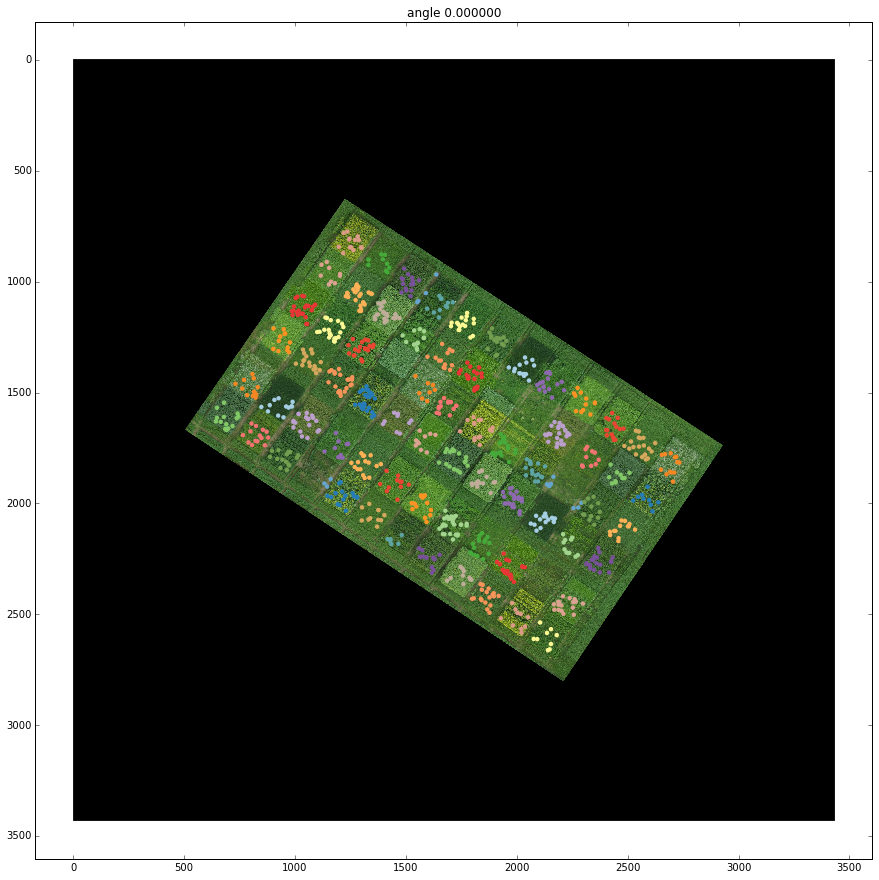

In [17]:
plot_for_angle(0)

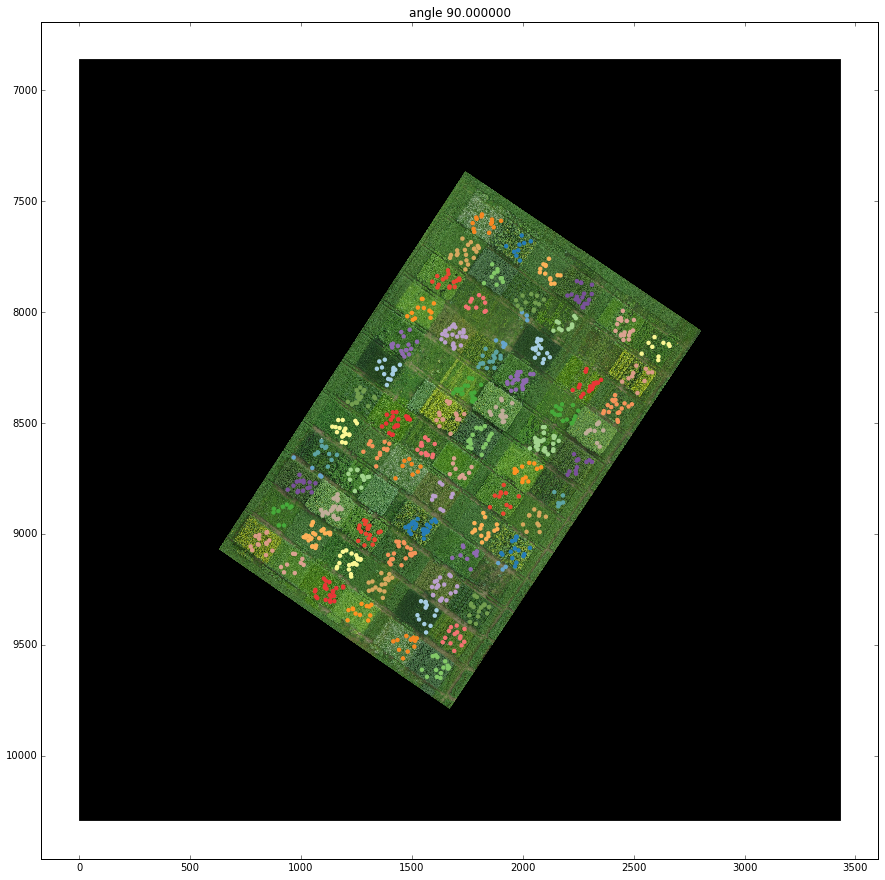

In [19]:
plot_for_angle(2)